### Case: criar máquina que faça a predição do fechamento de empresas

#### O banco de dados e o direcionamento desse trabalho foi feito com o apoio do canal Ciência de Dados
https://www.youtube.com/watch?v=zmIjoTWtFwU

#### Benefícios diretos desse projeto

- Decisões de empréstimos apropriadas

- Melhoria nas análises para parcerias estratégicas

- Aporte financeiro em Fintechs

### 1) Análise Exploratória

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# runtime
import timeit

# Pré-processamento (RFE --> eliminação recursiva de atributos)
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

# Modelo M1
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

np.warnings.filterwarnings('ignore')

In [2]:
#importando o banco de dados em uma variável
banco = pd.read_csv('falencia.csv')

# Verificação de valores nulos
print(banco.isnull().values.any())

# Verifica o padrão do DataFrame
print(banco.shape)

# Mostra as cinco primeiras linhas
banco.head()

False
(6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


#### No quadro acima temos 96 variáveis, sendo: 95 para análise e uma target (Bankrupt?)

In [3]:
# Verificando as variáveis
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### 2) Pré-processamento dos dados

In [4]:
# Conjunto de treinamento

#todas as variáveis menos o target
x = banco.iloc[:,1:].values 

# utiliza apenas o target
y = banco.iloc[:,0].values.reshape(-1,1) 

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
# Determinar o número ideal de recursos
start = timeit.default_timer()

n_features = [5, 10, 15, 20, 25, 30, 35, 40]
for i in n_features:
    #construir o modelo com base na seleção de recursos
    select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select = i)
    
    select.fit(x_train, y_train)
    
    mask = select.get_support()
    
    x_train_rfe = select.transform(x_train)
    x_test_rfe = select.transform(x_test)
    
    score = RandomForestClassifier().fit(x_train_rfe, y_train).score(x_test_rfe, y_test)
    
    print("Teste score: {:.3f}".format(score), "número de recursos: {}".format(i))
    
    stop = timeit.default_timer()
    print('Time:', stop - start)

#### A opção por trabalhar com 25 variáveis foi feita por se tratar de uma quantidade viável de dados e com bom score

In [5]:
# Eliminação recursiva
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=25)

select.fit(x_train, y_train)

mask = select.get_support()

x_train_rfe = select.transform(x_train)
x_test_rfe = select.transform(x_test)

score = RandomForestClassifier().fit(x_train_rfe, y_train).score(x_test_rfe, y_test)

print("Teste score: {:.3f}".format(score), "número de recursos: {}".format(25))

features = pd.DataFrame({'features':list(banco.iloc[:,1:].keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
features.append('Bankrupt?')

Teste score: 0.971 número de recursos: 25


In [6]:
# AS principais variáveis selecionadas pelo RFE
banco = banco[features]
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 26 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    Non-industry income and expenditure/revenue              6819 non-null   float64
 2    Interest-bearing debt interest rate                      6819 non-null   float64
 3    Net Value Per Share (A)                                  6819 non-null   float64
 4    Net Value Per Share (C)                                  6819 non-null   float64
 5    Persistent EPS in the Last Four Seasons                  6819 non-null   float64
 6    Per Share Net profit before tax (Yuan ¥)                 6819 non-null   float64
 7    Net Value Growth Rate                                    6819 non-null   float64
 8    Interest Expense 

### Breve tradução e explicação de alguns termos (quando necessário)

#### ROA(C) before interest and depreciation before interest (EBITDA)
“Receitas antes de juros e depreciação antes de juros”
Na prática, com esse indicador, é possível mensurar o desempenho da empresa. Isso porque ele mostra quanto a companhia está gerando de lucro com suas atividades operacionais, deixando de fora dessa conta investimentos financeiros, empréstimos e impostos.
Portanto, o EBITDA é mais preciso para medir a produtividade e a eficiência do negócio do que o seu resultado final. O indicador é útil, por exemplo, para medir o desempenho de empresas endividadas. Nesses casos os encargos que essas empresas precisam pagar podem reduzir em muito o seu lucro ou mesmo resultar em prejuízo. 

#### Non-industry income and expenditure/revenue      
“Receitas e despesas / receitas não relacionadas com a indústria”

#### Interest-bearing debt interest rate                      
“Taxa de juros da dívida com juros”

#### Net Value Per Share (A) 
“Valor líquido por ação (A)”

#### Net Value Per Share (C)
“Valor líquido por ação (C)”

#### Persistent EPS in the Last Four Seasons                  
“Lucro por ação persistente nas últimas quatro temporadas”
É um indicador fundamentalista muito útil para ter uma noção real sobre a rentabilidade das ações de uma empresa

#### Per Share Net profit before tax 
“Lucro líquido por ação antes de impostos “

#### Net Value Growth Rate                                    
“Taxa de crescimento do valor líquido da empresa”

#### Interest Expense Ratio 
“Taxa de despesas de juros”

#### Total debt/Total net worth                               
“Dívida total / patrimônio líquido total”


#### Borrowing dependency                                     
“Dependência de empréstimo”

#### Net profit before tax/Paid-in capital 
“Lucro líquido antes de impostos / capital integralizado”

#### Accounts Receivable Turnover                             
“Rotatividade de contas a receber”

#### Inventory Turnover Rate (times)                          
“Taxa de rotatividade de estoque (vezes)”

#### Fixed Assets Turnover Frequency 
“Frequência de giro de ativos fixos”
O giro de ativos fixos (FAT) é um índice de eficiência que indica quão bem ou eficientemente uma empresa usa ativos fixos para gerar vendas. Este rácio divide as vendas líquidas pelos ativos fixos líquidos, calculados ao longo de um período anual. 

#### Allocation rate per person                               
“Taxa de alocação por pessoa”

#### Cash/Total Assets                                        
“Dinheiro / Total de ativos”

#### Cash/Current Liability 
“Dinheiro / passivo atual”

#### Inventory/Working Capital                                
“Estoque / Capital de Giro”

#### Working Capital/Equity                                   
“Capital de giro / patrimônio líquido”


#### Net Income to Total Assets                               
“Lucro líquido para ativos totais”

#### Net Income to Stockholder's Equity                       
“Lucro líquido sobre o patrimônio líquido”
Ele serve para medir o retorno total em lucro líquido gerado em relação ao patrimônio líquido (diferença entre ativo e passivo). Em outras palavras, o quanto ela é eficiente em ser rentável com os recursos que tem disponíveis.

#### Degree of Financial Leverage (DFL)                       
“Grau de Alavancagem Financeira ”
O Grau de Alavancagem Financeira, ou simplesmente GAF, evidencia quais os efeitos das variações ocorridas no Lucro Antes dos Juros e do Imposto de Renda que refletem no Lucro Líquido. As relações são as seguintes:
•	Quanto maior for o GAF da organização, maior será o endividamento e o risco financeiro.
•	Se a alavancagem financeira de uma empresa for maior com relação ao seu endividamento, maior será o seu índice de alavancagem. Sendo assim, para que uma empresa obtenha maiores ganhos ela terá que correr maiores riscos.


#### Interest Coverage Ratio (Interest expense to EBIT)       
“Taxa de cobertura de juros (despesas de juros para o EBIT)”
O índice de cobertura de juros (ICJ) é tanto um índice de avaliação da capacidade de pagamento da dívida quanto um índice de lucratividade de uma companhia. Ele é usado por bancos e por empresas para atestar a capacidade de pagamento da dívida.

#### Equity to Liability                                      
“Equidade para passivo”
O termo Liability, é muito utilizado no mercado financeiro. No Brasil, a palavra foi adaptada e costuma aparecer como “responsabilidade” ou “passivos”. 

#### Bankrupt?
“Falido”


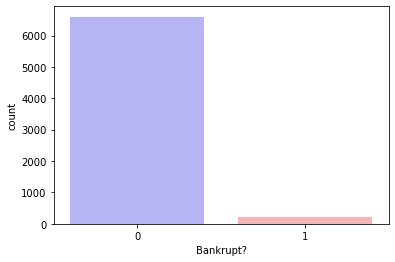

Bankrupt?
0    6599
1     220
dtype: int64

In [7]:
# Gráficos
sns.countplot(data=banco, x='Bankrupt?', palette='bwr')
plt.show()

banco.groupby('Bankrupt?').size()

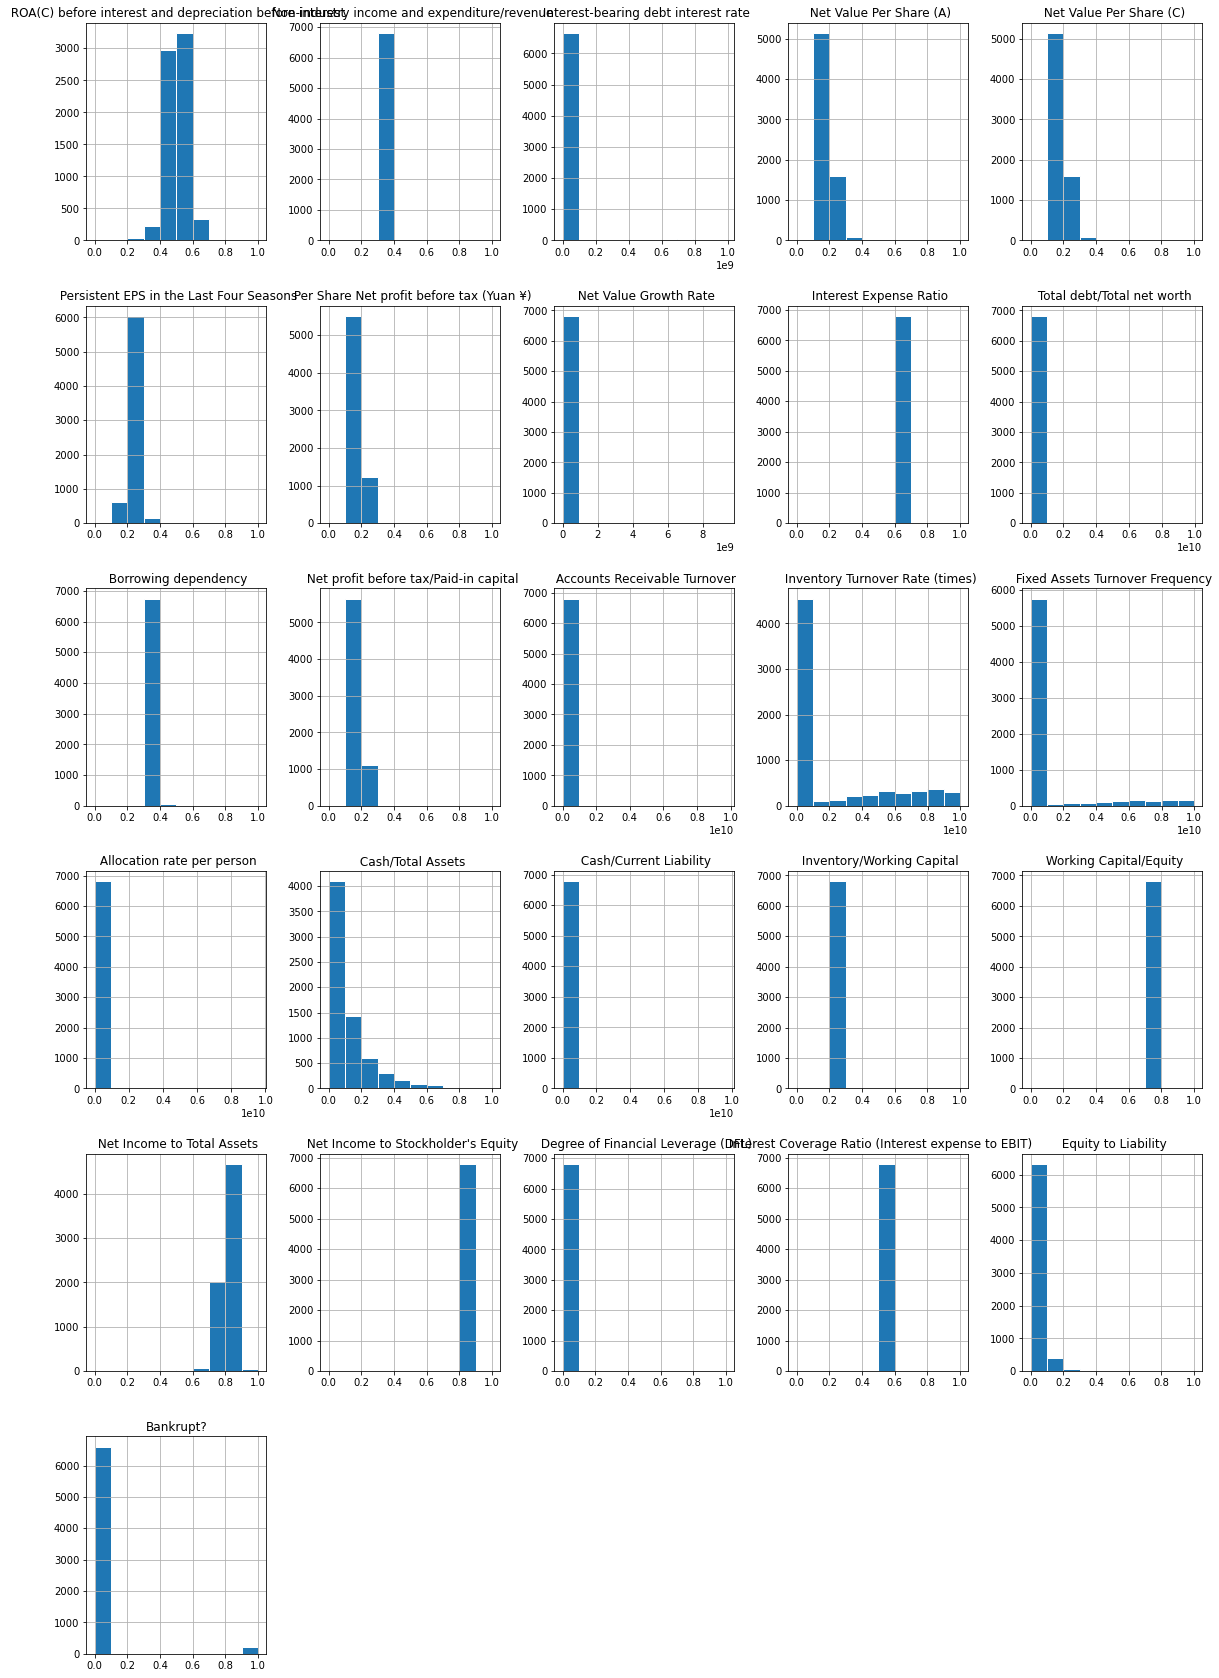

In [8]:
banco.hist(figsize=(20,30), edgecolor='white')
plt.show()

In [9]:
bins = pd.cut(banco[' Non-industry income and expenditure/revenue'], bins=10)
bins = pd.DataFrame(bins)
bins.value_counts()

 Non-industry income and expenditure/revenue
(0.3, 0.4]                                      6794
(0.2, 0.3]                                        20
(-0.001, 0.1]                                      2
(0.4, 0.5]                                         1
(0.7, 0.8]                                         1
(0.9, 1.0]                                         1
(0.1, 0.2]                                         0
(0.5, 0.6]                                         0
(0.6, 0.7]                                         0
(0.8, 0.9]                                         0
dtype: int64

Rows with outliers: 6819
Rows without outliers: 6631
information lost = 188 rows


<AxesSubplot:>

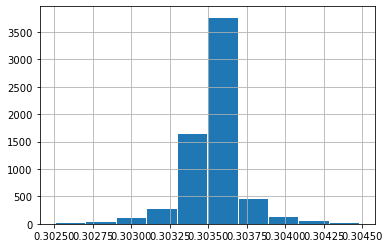

In [10]:
# Avaliando Outliers
lower = banco[' Non-industry income and expenditure/revenue'] > 0.3025
upper = banco[' Non-industry income and expenditure/revenue'] < 0.3045

close = banco[lower & upper]
print('Rows with outliers: {}'.format(banco.shape[0]))
print('Rows without outliers: {}'.format(close.shape[0]))
print('information lost = {} rows'.format(banco.shape[0]-close.shape[0]))
close[' Non-industry income and expenditure/revenue'].hist(edgecolor='white')

#### A distribuição em questão é normal, mas é altamente influenciada pelos outliers. Portanto, a mediana será uma ferramenta mais eficiente para medidas centrais

In [11]:
display(banco.describe())
banco.shape

,ROA(C) before interest and depreciation before interest,Non-industry income and expenditure/revenue,Interest-bearing debt interest rate,Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Net Value Growth Rate,Interest Expense Ratio,Total debt/Total net worth,...,Cash/Total Assets,Cash/Current Liability,Inventory/Working Capital,Working Capital/Equity,Net Income to Total Assets,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?
count,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6.819000e+03,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.303623,1.644801e+07,0.190633,0.190672,0.228813,0.184361,1.566212e+06,0.630991,4.416337e+06,...,0.124095,3.715999e+07,0.277395,0.735817,0.807760,0.840402,0.027541,0.565358,0.047578,0.032263
std,0.060686,0.011163,1.082750e+08,0.033474,0.033480,0.033263,0.033180,1.141594e+08,0.011238,1.684069e+08,...,0.139251,5.103509e+08,0.010469,0.011678,0.040332,0.014523,0.015668,0.013214,0.050014,0.176710
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.303466,2.030203e-04,0.173613,0.173676,0.214711,0.170370,4.409689e-04,0.630612,3.007049e-03,...,0.033543,1.973008e-03,0.277034,0.733612,0.796750,0.840115,0.026791,0.565158,0.024477,0.000000
50%,0.502706,0.303525,3.210321e-04,0.184400,0.184400,0.224544,0.179709,4.619555e-04,0.630698,5.546284e-03,...,0.074887,4.903886e-03,0.277178,0.736013,0.810619,0.841179,0.026808,0.565252,0.033798,0.000000
75%,0.535563,0.303585,5.325533e-04,0.199570,0.199612,0.238820,0.193493,4.993621e-04,0.631125,9.273293e-03,...,0.161073,1.280557e-02,0.277429,0.738560,0.826455,0.842357,0.026913,0.565725,0.052838,0.000000
max,1.000000,1.000000,9.900000e+08,1.000000,1.000000,1.000000,1.000000,9.330000e+09,1.000000,9.940000e+09,...,1.000000,9.650000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(6819, 26)

<AxesSubplot:>

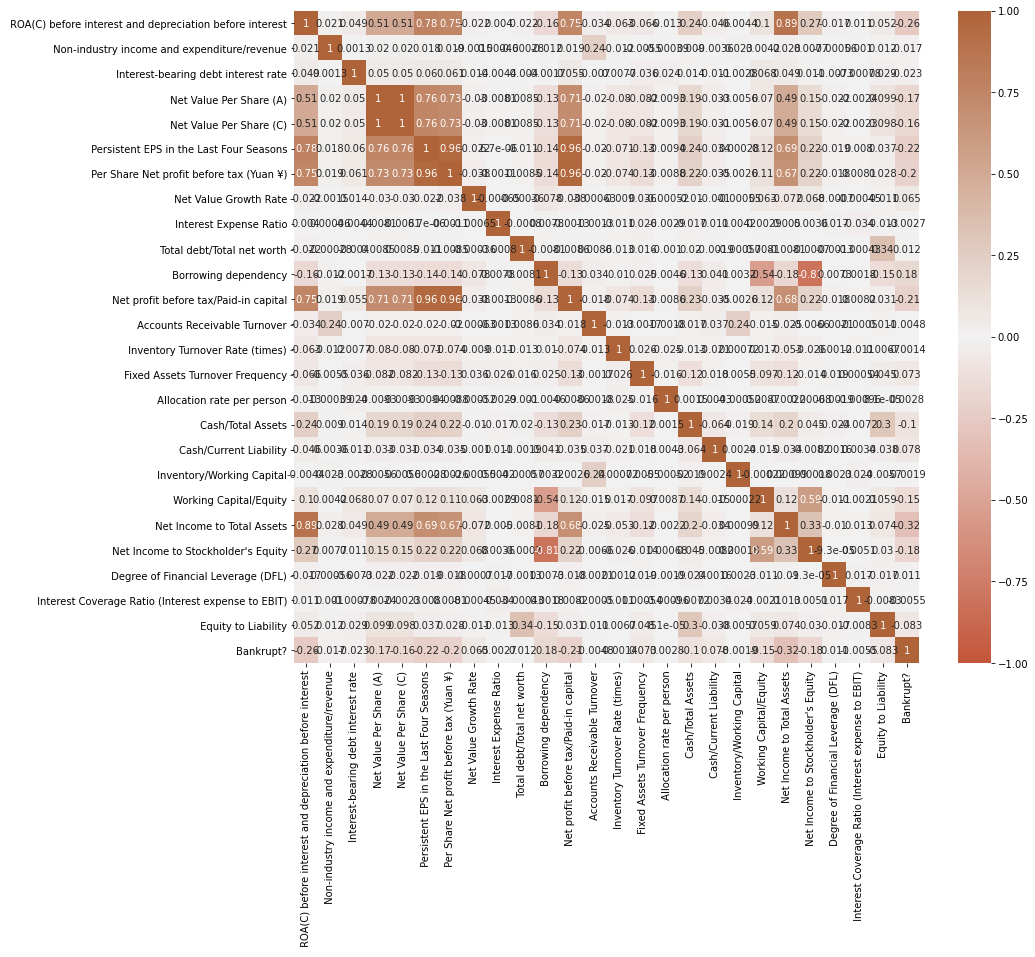

In [12]:
fig, ax = plt.subplots(figsize=(14,12))

sns.heatmap(banco.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 30, as_cmap=True), annot=True)

#### Vamos inspecionar os 3 principais e ver se encontramos algum padrão para falência

<AxesSubplot:xlabel=" Net Income to Stockholder's Equity", ylabel=' Borrowing dependency'>

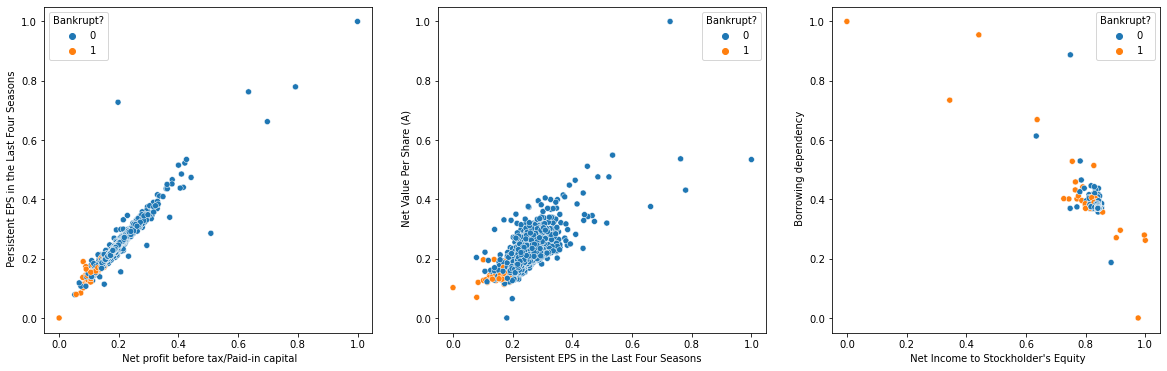

In [16]:
fig, ax = plt.subplots(1,3, figsize=(20,6))

sns.scatterplot(data=banco, x=' Net profit before tax/Paid-in capital', y=' Persistent EPS in the Last Four Seasons', hue='Bankrupt?', ax=ax[0])
sns.scatterplot(data=banco, x=' Persistent EPS in the Last Four Seasons', y=' Net Value Per Share (A)', hue='Bankrupt?', ax=ax[1])
sns.scatterplot(data=banco, x=" Net Income to Stockholder's Equity", y=' Borrowing dependency', hue='Bankrupt?', ax=ax[2])

### Algumas conclusões

- Alta 'taxa da dívida com juros' tende a ir a falência

- Alta 'Dívida total/patrimônio líquido total' tende a ir a falência

- Alta 'Frequência de giros de ativos fixos' tende a ir a falência

- Baixo 'Caixa/Ativo total' tende a ir a falência

- 'Patrimônio líquido para passivo' baixo tende a ir a falência

#### Vamos comparar a mediana de empresas falidas e não falidas de cada recurso para ver se podemos encontrar uma tendência

IndexError: index 15 is out of bounds for axis 0 with size 15

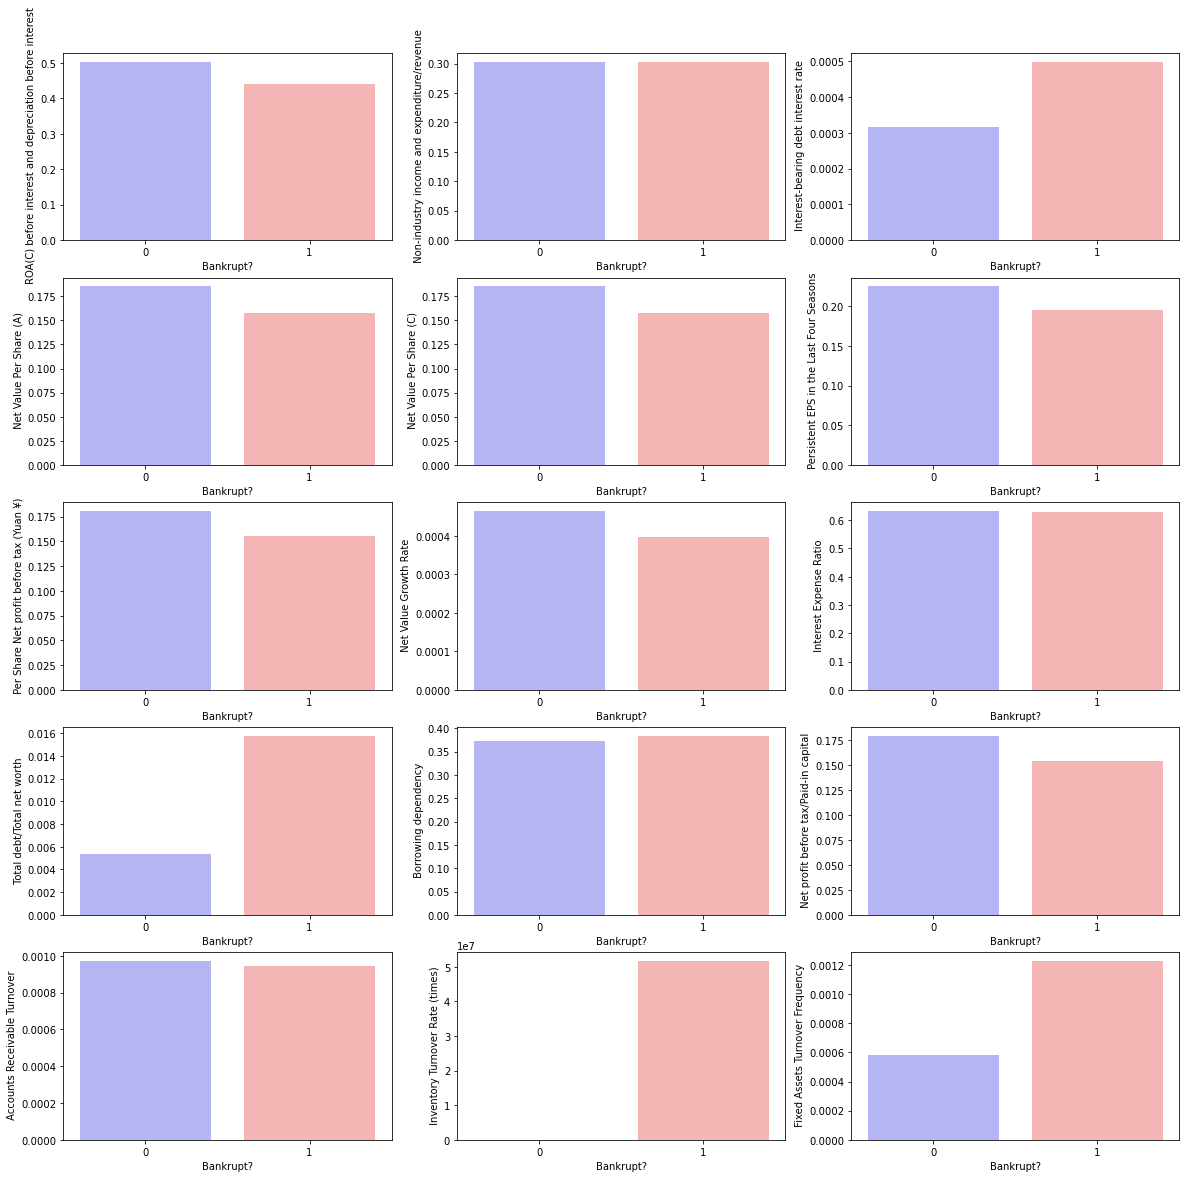

In [18]:
central = banco.groupby('Bankrupt?').median().reset_index()
features = list(central.keys()[1:])

fig, ax = plt.subplots(5,3, figsize=(20,20))

ax = ax.ravel()
position = 0

for i in features:
    sns.barplot(data=central, x='Bankrupt?', y=i, ax=ax[position], palette='bwr')
    position += 1
    
plt.show()
display(central)

### Criando Máquinas preditivas

## KNN
Um KNN, se nos lembrarmos das conclusões da seção 3 e 4, um algoritmo KNN com características 
'Lucro líquido antes de impostos / Capital integralizado',

'EPS persistente nas últimas quatro temporadas', "Taxa de juros da dívida com juros", 

"Dívida total / Patrimônio líquido total ",

" Frequência de giro do ativo fixo "," Caixa / Ativo total Equidade para passivo 


Também temos que levar em consideração que estamos lidando com dados altamente desequilibrados,

então a (oversampling) sobreamostragem fará parte da fase de pré-processamento.

In [21]:
# Criando a máquina
model = ['Bankrupt?', ' Net profit before tax/Paid-in capital', ' Persistent EPS in the Last Four Seasons', " Interest-bearing debt interest rate", " Total debt/Total net worth", " Fixed Assets Turnover Frequency", " Cash/Total Assets"]
model = banco[model]
X = model.iloc[:,1:].values
y = model.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

best_n = 0
best_training = 0
best_test = 0

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    training = knn.score(X_train, y_train)
    test = knn.score(X_test, y_test)
    
    if test > best_test:
        best_n = i
        best_training = training
        best_test = test

print("best number of neighbors: {}".format(best_n))
print("best training set score : {:.3f}".format(best_training))
print("best test set score: {:.3f}".format(best_test))


best number of neighbors: 7
best training set score : 0.970
best test set score: 0.969


In [22]:
start = timeit.default_timer()

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print("training set score : {:.2f}".format(knn.score(X_train, y_train)))
print("test set score: {:.2f}".format(knn.score(X_test, y_test)))

stop = timeit.default_timer()
print('Time: ', stop - start)  

training set score : 0.97
test set score: 0.97
Time:  0.4923083999992741


### GBM - Classificador Gradient Boosting

Aqui, vamos primeiro aplicar um classificador mais sofisticado em nossos dados reduzidos e, em seguida, em todo o conjunto de dados. No final, comparamos os três modelos

In [23]:
X = model.iloc[:,1:].values
y = model.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

start = timeit.default_timer()
gbrt = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=1).fit(X_train, y_train)

print("training set score : {:.2f}".format(gbrt.score(X_train, y_train)))
print("test set score: {:.2f}".format(gbrt.score(X_test, y_test)))

stop = timeit.default_timer()
print('Time: ', stop - start)  

training set score : 0.97
test set score: 0.97
Time:  0.36987239999962185


### Atenção:

### Gradient Boosting Classifer (com todas as 95 variáveis)

In [24]:
bank = pd.read_csv('falencia.csv')
X = bank.iloc[:,1:].values
y = bank.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

start = timeit.default_timer()
gbrt = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=1).fit(X_train, y_train)

print("training set score : {:.2f}".format(gbrt.score(X_train, y_train)))
print("test set score: {:.2f}".format(gbrt.score(X_test, y_test)))

stop = timeit.default_timer()
print('Time: ', stop - start)

training set score : 0.97
test set score: 0.97
Time:  5.216325599999436


#### RESULTADO

Os três modelos apresentaram uma precisão definida de 0,97, enquanto reduzimos significativamente o número de recursos (apenas 7).

Isso nos levou a economizar tempo de execução (de 5,47 segundos para apenas 0,5)

Com os recursos reduzidos, também pudemos descrever como uma empresa pode ir à falência ou não, explicando melhor o modelo. 